In [63]:
# Importing the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [64]:
data = pd.read_csv("oasis_longitudinal.csv")
data.head()

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,NaN,22.0,0.5,1698,0.701,1.034


In [65]:
data.isnull().sum()

Subject ID     0
MRI ID         0
Group          0
Visit          0
MR Delay       0
M/F            0
Hand           0
Age            0
EDUC           0
SES           19
MMSE           2
CDR            0
eTIV           0
nWBV           0
ASF            0
dtype: int64

In [66]:
# Results on subject's 1st visit

df = data[data["Visit"] == 1]
df

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
5,OAS2_0004,OAS2_0004_MR1,Nondemented,1,0,F,R,88,18,3.0,28.0,0.0,1215,0.710,1.444
7,OAS2_0005,OAS2_0005_MR1,Nondemented,1,0,M,R,80,12,4.0,28.0,0.0,1689,0.712,1.039
10,OAS2_0007,OAS2_0007_MR1,Demented,1,0,M,R,71,16,NaN,28.0,0.5,1357,0.748,1.293
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359,OAS2_0182,OAS2_0182_MR1,Demented,1,0,M,R,73,12,NaN,23.0,0.5,1661,0.698,1.056
361,OAS2_0183,OAS2_0183_MR1,Nondemented,1,0,F,R,66,13,2.0,30.0,0.0,1495,0.746,1.174
365,OAS2_0184,OAS2_0184_MR1,Demented,1,0,F,R,72,16,3.0,24.0,0.5,1354,0.733,1.296
367,OAS2_0185,OAS2_0185_MR1,Demented,1,0,M,R,80,16,1.0,28.0,0.5,1704,0.711,1.030


In [67]:
df.isnull().sum()

Subject ID    0
MRI ID        0
Group         0
Visit         0
MR Delay      0
M/F           0
Hand          0
Age           0
EDUC          0
SES           8
MMSE          0
CDR           0
eTIV          0
nWBV          0
ASF           0
dtype: int64

In [68]:
# Fill null values in SES column with mean value

df['SES']= df['SES'].fillna(data['SES'].mean())

<ipython-input-68-171f973c6747>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['SES']= df['SES'].fillna(data['SES'].mean())


In [69]:
df.isnull().sum()

Subject ID    0
MRI ID        0
Group         0
Visit         0
MR Delay      0
M/F           0
Hand          0
Age           0
EDUC          0
SES           0
MMSE          0
CDR           0
eTIV          0
nWBV          0
ASF           0
dtype: int64

In [70]:
# Drop columns to reduce dataframe and X values

df=df.drop(['Subject ID', 'MRI ID', 'MR Delay', 'Visit', 'Hand'], axis=1) 
df

,Group,M/F,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,Nondemented,M,87,14,2.000000,27.0,0.0,1987,0.696,0.883
2,Demented,M,75,12,2.460452,23.0,0.5,1678,0.736,1.046
5,Nondemented,F,88,18,3.000000,28.0,0.0,1215,0.710,1.444
7,Nondemented,M,80,12,4.000000,28.0,0.0,1689,0.712,1.039
10,Demented,M,71,16,2.460452,28.0,0.5,1357,0.748,1.293
...,...,...,...,...,...,...,...,...,...,...
359,Demented,M,73,12,2.460452,23.0,0.5,1661,0.698,1.056
361,Nondemented,F,66,13,2.000000,30.0,0.0,1495,0.746,1.174
365,Demented,F,72,16,3.000000,24.0,0.5,1354,0.733,1.296
367,Demented,M,80,16,1.000000,28.0,0.5,1704,0.711,1.030


In [71]:
# Binary encoded gender 

clean = df.copy()
data_binary_encoded = pd.get_dummies(clean, columns=["M/F"])
data_binary_encoded.head()

,Group,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF,M/F_F,M/F_M
0,Nondemented,87,14,2.000000,27.0,0.0,1987,0.696,0.883,0,1
2,Demented,75,12,2.460452,23.0,0.5,1678,0.736,1.046,0,1
5,Nondemented,88,18,3.000000,28.0,0.0,1215,0.710,1.444,1,0
7,Nondemented,80,12,4.000000,28.0,0.0,1689,0.712,1.039,0,1
10,Demented,71,16,2.460452,28.0,0.5,1357,0.748,1.293,0,1


In [72]:
# Rename columns to Female and Male subjects

data_binary_encoded=data_binary_encoded.rename(columns={'M/F_M':'Male','M/F_F':'Female'})
data_binary_encoded

,Group,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF,Female,Male
0,Nondemented,87,14,2.000000,27.0,0.0,1987,0.696,0.883,0,1
2,Demented,75,12,2.460452,23.0,0.5,1678,0.736,1.046,0,1
5,Nondemented,88,18,3.000000,28.0,0.0,1215,0.710,1.444,1,0
7,Nondemented,80,12,4.000000,28.0,0.0,1689,0.712,1.039,0,1
10,Demented,71,16,2.460452,28.0,0.5,1357,0.748,1.293,0,1
...,...,...,...,...,...,...,...,...,...,...,...
359,Demented,73,12,2.460452,23.0,0.5,1661,0.698,1.056,0,1
361,Nondemented,66,13,2.000000,30.0,0.0,1495,0.746,1.174,1,0
365,Demented,72,16,3.000000,24.0,0.5,1354,0.733,1.296,1,0
367,Demented,80,16,1.000000,28.0,0.5,1704,0.711,1.030,0,1


In [73]:
# Assign X (DATA COLUMNS) and y "Group" (target = DEMENTED/NONDEMENTED/CONVERTED)

X = data_binary_encoded.drop("Group", axis=1)
y = data_binary_encoded["Group"]
print(X.shape, y.shape)

(150, 10) (150,)


In [74]:
# Split our data into training and testing

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [75]:
## LOGISTIC REGRESSION (150 SAMPLES) ##

from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(max_iter=10000)
classifier

LogisticRegression(max_iter=10000)

In [76]:
# Fit (train) or model using the training data

classifier.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [77]:
# Validate the model using the test data

print(f"Training Data Score: {classifier.score(X_train, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test, y_test)}")

Training Data Score: 0.9107142857142857
Testing Data Score: 0.868421052631579


In [78]:
# Make predictions

predictions = classifier.predict(X_test)
print(f"First 10 Predictions:   {predictions[:10]}")
print(f"First 10 Actual labels: {y_test[:10].tolist()}")

First 10 Predictions:   ['Nondemented' 'Nondemented' 'Nondemented' 'Nondemented' 'Nondemented'
 'Nondemented' 'Demented' 'Nondemented' 'Demented' 'Demented']
First 10 Actual labels: ['Converted', 'Nondemented', 'Converted', 'Nondemented', 'Nondemented', 'Nondemented', 'Nondemented', 'Converted', 'Demented', 'Demented']


In [79]:
pd.DataFrame({"Prediction": predictions, "Actual": y_test}).reset_index(drop=True)

,Prediction,Actual
0,Nondemented,Converted
1,Nondemented,Nondemented
2,Nondemented,Converted
3,Nondemented,Nondemented
4,Nondemented,Nondemented
5,Nondemented,Nondemented
6,Demented,Nondemented
7,Nondemented,Converted
8,Demented,Demented
9,Demented,Demented


In [80]:
## SVM - Support Vector Machine (150 SAMPLES) ##

target = data_binary_encoded["Group"]
target_names = ["Demented", "Nondemented", "Converted"]

In [81]:
data = data_binary_encoded.drop("Group", axis=1).reset_index(drop=True)
feature_names = data.columns
data.head()

,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF,Female,Male
0,87,14,2.000000,27.0,0.0,1987,0.696,0.883,0,1
1,75,12,2.460452,23.0,0.5,1678,0.736,1.046,0,1
2,88,18,3.000000,28.0,0.0,1215,0.710,1.444,1,0
3,80,12,4.000000,28.0,0.0,1689,0.712,1.039,0,1
4,71,16,2.460452,28.0,0.5,1357,0.748,1.293,0,1


In [82]:
X_train, X_test, y_train, y_test = train_test_split(data, target)

In [83]:
# Support vector machine linear classifier

from sklearn.svm import SVC 
model = SVC(kernel='linear')
model.fit(X_train, y_train)

SVC(kernel='linear')

In [84]:
# Model Accuracy

print('Test Accuracy: %.3f' % model.score(X_test, y_test))

Test Accuracy: 0.789


In [85]:
np.set_printoptions(precision=2)

Confusion matrix, without normalization
[[ 0  0  8]
 [ 0 16  0]
 [ 0  0 14]]
Normalized confusion matrix
[[0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]]


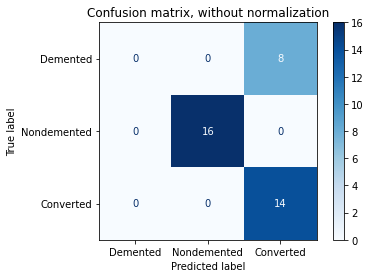

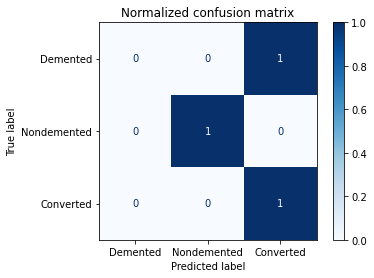

In [86]:
from sklearn.metrics import plot_confusion_matrix

# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(model, X_test, y_test,
                                 display_labels=target_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

In [87]:
# Calculate classification report

from sklearn.metrics import classification_report
predictions = model.predict(X_test)
print(classification_report(y_test, predictions,
                            target_names=target_names))

              precision    recall  f1-score   support

    Demented       0.00      0.00      0.00         8
 Nondemented       1.00      1.00      1.00        16
   Converted       0.64      1.00      0.78        14

    accuracy                           0.79        38
   macro avg       0.55      0.67      0.59        38
weighted avg       0.66      0.79      0.71        38

C:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\anaconda\lib

In [88]:
## DECISION TREE (150 SAMPLES) ##

from sklearn import tree

In [89]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.7105263157894737

In [90]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=200)
rf = rf.fit(X_train, y_train)
print(rf.score(X_test, y_test))
print(rf.score(X_train, y_train))

0.7894736842105263
1.0


In [91]:
sorted(zip(rf.feature_importances_, feature_names), reverse=True)

[(0.503086110868408, 'CDR'),
 (0.21238615124589005, 'MMSE'),
 (0.05274048727292083, 'nWBV'),
 (0.05160927709678448, 'ASF'),
 (0.046486379067470524, 'eTIV'),
 (0.04257907539084988, 'Age'),
 (0.036995561473384106, 'EDUC'),
 (0.028736563936972458, 'SES'),
 (0.013380980791819229, 'Female'),
 (0.011999412855500267, 'Male')]

In [92]:
## OVERSAMPLING ##

from sklearn.datasets import make_classification
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

In [93]:
# Define oversampling strategy

oversample = RandomOverSampler(sampling_strategy='minority')

In [94]:
# Fit and apply the transform

X_train_over, y_train_over = oversample.fit_resample(X_train, y_train)

In [95]:
# Summarize class distribution

print(Counter(y_train_over))

Counter({'Nondemented': 58, 'Converted': 58, 'Demented': 48})


In [96]:
## PCA - Principal Component Analysis ##

# Use StandardScaler for standardization ?
from sklearn.preprocessing import StandardScaler 
X_train_std = StandardScaler().fit_transform(X_train_over)
X_train_std

array([[ 1.59, -1.02,  0.78, ...,  0.11,  0.82, -0.82],
       [-1.95,  0.98, -1.05, ..., -2.47, -1.22,  1.22],
       [-0.38,  0.98, -0.13, ..., -0.63, -1.22,  1.22],
       ...,
       [ 0.41,  0.98, -1.05, ..., -1.15, -1.22,  1.22],
       [ 0.54,  1.65, -1.05, ..., -0.85, -1.22,  1.22],
       [-1.43, -1.02, -0.13, ...,  0.73,  0.82, -0.82]])

In [97]:
X_test_std = StandardScaler().fit_transform(X_test)
X_test_std

array([[-0.37,  0.66, -0.52,  0.5 , -0.78, -1.87,  1.56,  2.29,  0.85,
        -0.85],
       [-0.79,  0.66,  1.28, -0.34,  0.7 ,  1.55, -0.02, -1.38, -1.17,
         1.17],
       [-0.94,  0.66, -1.42,  0.79, -0.78, -0.45,  0.27,  0.33,  0.85,
        -0.85],
       [ 0.35, -0.84,  0.38,  0.5 , -0.78, -0.08, -0.41, -0.05,  0.85,
        -0.85],
       [ 1.92, -0.46,  0.38,  0.5 , -0.78, -1.71,  0.27,  2.03,  0.85,
        -0.85],
       [ 1.92, -0.09, -0.52,  0.5 , -0.78,  0.09,  0.49, -0.22,  0.85,
        -0.85],
       [ 0.21, -0.84,  1.28,  0.5 , -0.78, -0.58, -0.3 ,  0.49,  0.85,
        -0.85],
       [-1.94, -0.84,  1.28, -2.88,  0.7 ,  0.17, -0.37, -0.29, -1.17,
         1.17],
       [ 1.07, -0.84, -0.52,  0.22, -0.78, -0.55,  0.2 ,  0.45,  0.85,
        -0.85],
       [-0.08, -0.84,  1.28,  0.22, -0.78,  0.1 , -0.12, -0.22, -1.17,
         1.17],
       [-1.37, -0.84,  1.28,  0.79,  0.7 , -0.23,  1.34,  0.1 , -1.17,
         1.17],
       [-0.37, -0.09,  0.38,  0.5 ,  0.7 , 

In [98]:
# Use of Python library to directly compute Principal Components

from sklearn.decomposition import PCA
pca = PCA(n_components=2) # component can be changed to 3 ?

In [99]:
principalComponents = pca.fit_transform(X_train_std) 
principalDf_X_train = pd.DataFrame(data = principalComponents , columns = ['principal component 1','principal component 2'])
principalDf_X_train.head(5)

,principal component 1,principal component 2
0,-0.967810,0.217338
1,3.819171,0.185875
2,1.662335,-1.041238
3,2.709894,-0.725307
4,-1.586488,1.585787


In [100]:
# Added "Group" for 2D PCA projection of principalDf_X_train

finalDf_X_train = pd.concat([principalDf_X_train, pd.DataFrame(y, columns = ['Group'])], axis = 1) 
finalDf_X_train.head()

,principal component 1,principal component 2,Group
0,-0.967810,0.217338,Nondemented
1,3.819171,0.185875,NaN
2,1.662335,-1.041238,Demented
3,2.709894,-0.725307,NaN
4,-1.586488,1.585787,NaN


In [101]:
principalComponents = pca.fit_transform(X_test_std) 
principalDf_X_test = pd.DataFrame(data = principalComponents , columns = ['principal component 1', 'principal component 2'])
principalDf_X_test.head(5)

,principal component 1,principal component 2
0,-3.129413,-0.216773
1,2.633606,0.745631
2,-1.212383,-1.121526
3,-1.143011,-0.363109
4,-3.026930,-0.549915


In [102]:
# Added "Group" for 2D PCA projection of principalDf_X_test

finalDf_X_test = pd.concat([principalDf_X_test, pd.DataFrame(y, columns = ['Group'])], axis = 1) 
finalDf_X_test.head()

,principal component 1,principal component 2,Group
0,-3.129413,-0.216773,Nondemented
1,2.633606,0.745631,NaN
2,-1.212383,-1.121526,Demented
3,-1.143011,-0.363109,NaN
4,-3.026930,-0.549915,NaN


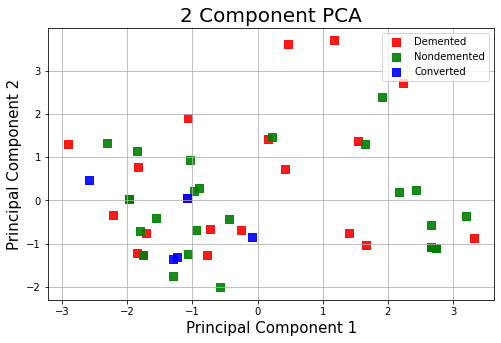

In [103]:
# Visualize 2D Projection of finalDf_X_train

fig = plt.figure(figsize = (8,5)) 
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15) 
ax.set_ylabel('Principal Component 2', fontsize = 15) 
ax.set_title('2 Component PCA', fontsize = 20) 
targets = ['Demented', 'Nondemented', 'Converted'] 
colors = ['r', 'g', 'b'] 

for target, color in zip(targets,colors): 
    indicesToKeep = finalDf_X_train['Group'] == target
    ax.scatter(finalDf_X_train.loc[indicesToKeep, 'principal component 1'] , finalDf_X_train.loc[indicesToKeep, 'principal component 2'] , marker='s', c = color , s = 50, alpha=.9) 
ax.legend(targets) 
ax.grid()

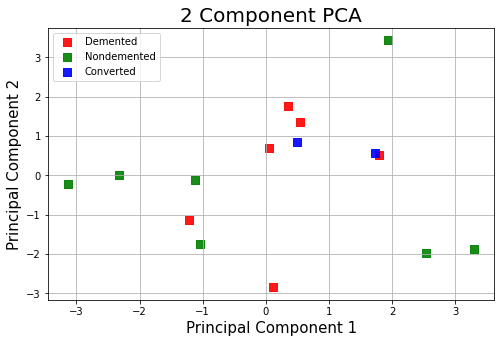

In [104]:
# Visualize 2D Projection of finalDf_X_test

fig = plt.figure(figsize = (8,5)) 
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15) 
ax.set_ylabel('Principal Component 2', fontsize = 15) 
ax.set_title('2 Component PCA', fontsize = 20) 
targets = ['Demented', 'Nondemented', 'Converted'] 
colors = ['r', 'g', 'b'] 

for target, color in zip(targets,colors): 
    indicesToKeep = finalDf_X_test['Group'] == target
    ax.scatter(finalDf_X_test.loc[indicesToKeep, 'principal component 1'] , finalDf_X_test.loc[indicesToKeep, 'principal component 2'] , marker='s', c = color , s = 50, alpha=.9) 
ax.legend(targets) 
ax.grid()

In [105]:
## LOGISTIC REGRESSION with OVERSAMPLING ##

from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(max_iter=10000)
classifier

LogisticRegression(max_iter=10000)

In [106]:
# Fit (train) or model using the training data

classifier.fit(principalDf_X_train, y_train_over)

LogisticRegression(max_iter=10000)

In [107]:
# Validate the model using the test data

print(f"Training Data Score: {classifier.score(principalDf_X_train, y_train_over)}")
print(f"Testing Data Score: {classifier.score(principalDf_X_test, y_test)}")

Training Data Score: 0.5853658536585366
Testing Data Score: 0.5789473684210527


In [108]:
# Make predictions

predictions = classifier.predict(principalDf_X_test)
print(f"First 10 Predictions:   {predictions[:10]}")
print(f"First 10 Actual labels: {y_test[:10].tolist()}")

First 10 Predictions:   ['Nondemented' 'Demented' 'Nondemented' 'Nondemented' 'Nondemented'
 'Converted' 'Nondemented' 'Demented' 'Nondemented' 'Demented']
First 10 Actual labels: ['Nondemented', 'Demented', 'Converted', 'Converted', 'Nondemented', 'Nondemented', 'Nondemented', 'Demented', 'Converted', 'Nondemented']


In [109]:
pd.DataFrame({"Prediction": predictions, "Actual": y_test}).reset_index(drop=True)

,Prediction,Actual
0,Nondemented,Nondemented
1,Demented,Demented
2,Nondemented,Converted
3,Nondemented,Converted
4,Nondemented,Nondemented
5,Converted,Nondemented
6,Nondemented,Nondemented
7,Demented,Demented
8,Nondemented,Converted
9,Demented,Nondemented


In [110]:
## SVM with OVERSAMPLING ##

from sklearn.svm import SVC 
model = SVC(kernel='linear', probability=True)
model.fit(principalDf_X_train, y_train_over)

SVC(kernel='linear', probability=True)

In [111]:
# Model Accuracy

print('Test Accuracy: %.3f' % model.score(principalDf_X_test, y_test))

Test Accuracy: 0.605


In [112]:
# Calculate classification report

from sklearn.metrics import classification_report
predictions = model.predict(principalDf_X_test)
print(classification_report(y_test, predictions,
                            target_names=target_names))

              precision    recall  f1-score   support

    Demented       0.25      0.25      0.25         8
 Nondemented       0.87      0.81      0.84        16
   Converted       0.53      0.57      0.55        14

    accuracy                           0.61        38
   macro avg       0.55      0.54      0.55        38
weighted avg       0.61      0.61      0.61        38



In [113]:
## ROC - Receiver Operating Characteristic Curve (ROC AUC) - for imbalanced dataset ##

# Better representation of imbalanced learning #

from sklearn.metrics import roc_auc_score
roc = {label: [] for label in y_test.unique()}
#for label in y_test.unique():
#    model.fit(principalDf_X_train, train_class ==label)
#    predict_proba = model.predict_proba(principalDf_X_test)
#    roc[label] += roc_auc_score(y_test, predict_proba[:,1])
predict_proba = model.predict_proba(principalDf_X_test)
roc_auc_score(y_test, predict_proba, multi_class='ovr')

0.8184523809523809

Confusion matrix, without normalization
[[ 2  0  6]
 [ 2 13  1]
 [ 4  2  8]]
Normalized confusion matrix
[[0.25 0.   0.75]
 [0.12 0.81 0.06]
 [0.29 0.14 0.57]]


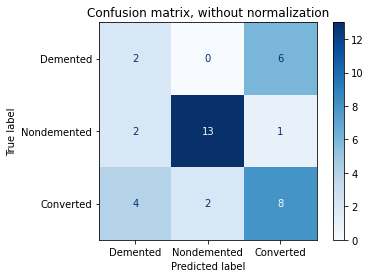

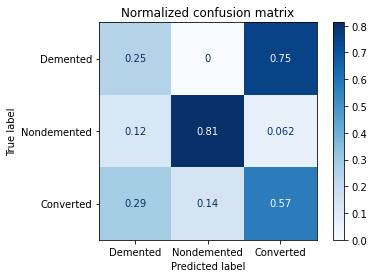

In [114]:
# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(model, principalDf_X_test, y_test,
                                 display_labels=target_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

In [115]:
## Grid Search with SVM and OVERSAMPLING ##

# Create the GridSearch estimator along with a parameter object containing the values to adjust
# Passes through a combination and train model a number of times
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [1, 5, 10, 50],
              'gamma': [0.0001, 0.0005, 0.001, 0.005]}
grid = GridSearchCV(model, param_grid, verbose=3, scoring="roc_auc_ovr")

In [116]:
# Fit the model using the grid search estimator. 
# This will take the SVC model and try each combination of parameters

grid.fit(principalDf_X_train, y_train_over)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 1/5] END ..............................C=1, gamma=0.0001; total time=   0.0s
[CV 2/5] END ..............................C=1, gamma=0.0001; total time=   0.0s
[CV 3/5] END ..............................C=1, gamma=0.0001; total time=   0.0s
[CV 4/5] END ..............................C=1, gamma=0.0001; total time=   0.0s
[CV 5/5] END ..............................C=1, gamma=0.0001; total time=   0.0s
[CV 1/5] END ..............................C=1, gamma=0.0005; total time=   0.0s
[CV 2/5] END ..............................C=1, gamma=0.0005; total time=   0.0s
[CV 3/5] END ..............................C=1, gamma=0.0005; total time=   0.0s
[CV 4/5] END ..............................C=1, gamma=0.0005; total time=   0.0s
[CV 5/5] END ..............................C=1, gamma=0.0005; total time=   0.0s
[CV 1/5] END ...............................C=1, gamma=0.001; total time=   0.0s
[CV 2/5] END ...............................C=1,

GridSearchCV(estimator=SVC(kernel='linear', probability=True),
             param_grid={'C': [1, 5, 10, 50],
                         'gamma': [0.0001, 0.0005, 0.001, 0.005]},
             scoring='roc_auc_ovr', verbose=3)

In [117]:
# List the best parameters for this dataset

print(grid.best_params_)

{'C': 5, 'gamma': 0.0005}


In [118]:
# List the best score

print(grid.best_score_)

0.7821090381828195


In [119]:
# Make predictions with the hypertuned model

predictions = grid.predict(principalDf_X_test)

In [120]:
# Calculate classification report

from sklearn.metrics import classification_report
print(classification_report(y_test, predictions,
                            target_names=["Demented", "Nondemented", "Converted"]))

              precision    recall  f1-score   support

    Demented       0.25      0.25      0.25         8
 Nondemented       0.87      0.81      0.84        16
   Converted       0.53      0.57      0.55        14

    accuracy                           0.61        38
   macro avg       0.55      0.54      0.55        38
weighted avg       0.61      0.61      0.61        38



In [106]:
              precision    recall  f1-score   support

    Demented       0.00      0.00      0.00         1
 Nondemented       1.00      1.00      1.00        16
   Converted       0.95      1.00      0.98        21

    accuracy                           0.97        38
   macro avg       0.65      0.67      0.66        38
weighted avg       0.95      0.97      0.96        38

['Demented', 'Nondemented', 'Converted']